In [3]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
x = wine.data
y = wine.target

In [6]:
import sklearn.preprocessing
x = sklearn.preprocessing.StandardScaler().fit_transform(x)

In [7]:
x.shape

(178, 13)

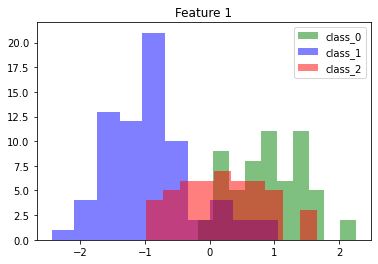

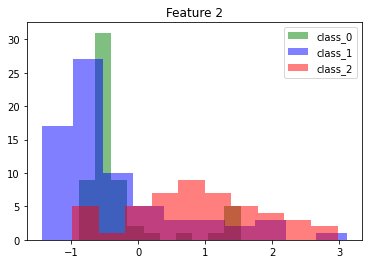

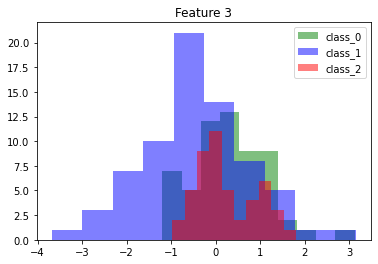

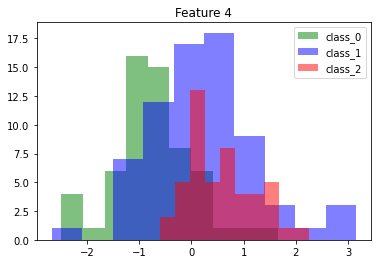

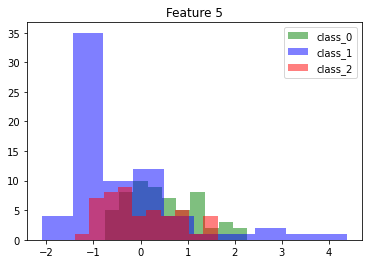

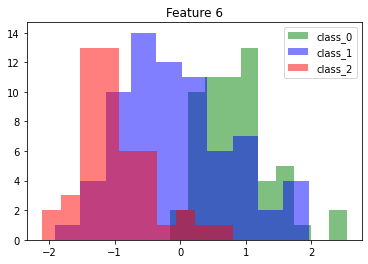

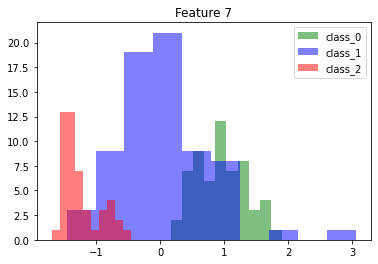

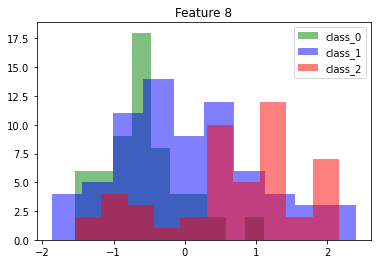

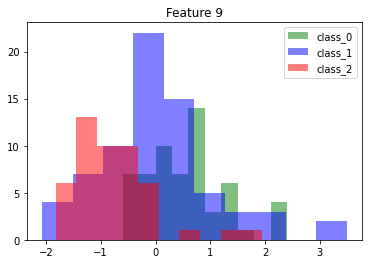

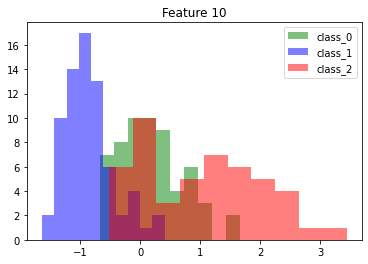

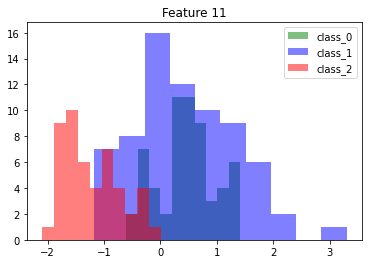

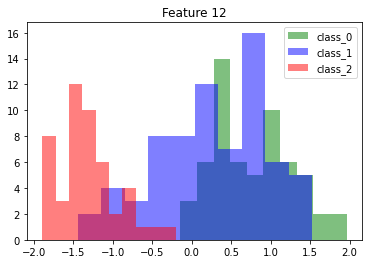

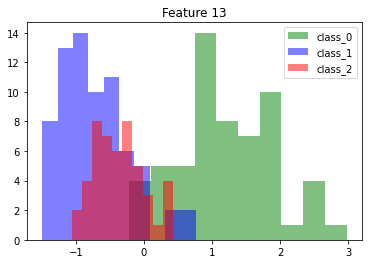

In [12]:
import matplotlib.pyplot as plt

for i in range(x.shape[1]):
    plt.hist(x[(y==0),i], alpha=0.5, color='green', label='class_0')
    plt.hist(x[(y==1),i], alpha=0.5, color='blue', label='class_1')
    plt.hist(x[(y==2),i], alpha=0.5, color='red', label='class_2')
    plt.title('Feature {}'.format(i+1))
    plt.legend()
    plt.show()

In [13]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as metrics

In [14]:
model = lm.LogisticRegression()

In [17]:
model.fit(x[:,0].reshape(-1,1),y)

LogisticRegression()

In [18]:
import numpy as np

In [25]:
x[:,0]

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

In [34]:
x_train, x_test, y_train, y_test = ms.train_test_split(
    x[:,0], y, test_size=0.2, random_state=42)

x_train_transformed = x_train.reshape(-1,1)
x_test_transformed = x_test.reshape(-1,1)

model.fit(x_train_transformed,
          y_train)

predictions = model.predict(x_test_transformed)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[14  0  0]
 [ 0 13  1]
 [ 5  1  2]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.93      0.93      0.93        14
           2       0.67      0.25      0.36         8

    accuracy                           0.81        36
   macro avg       0.78      0.73      0.71        36
weighted avg       0.80      0.81      0.77        36



In [60]:
col_num = x.shape[1]


x_train, x_test, y_train, y_test = ms.train_test_split(
    x, y, test_size=0.2)


model.fit(x_train,
        y_train)

predictions = model.predict(x_test)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[12  0  0]
 [ 0 15  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

